In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('../data/amazon_reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
missing_values = df.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


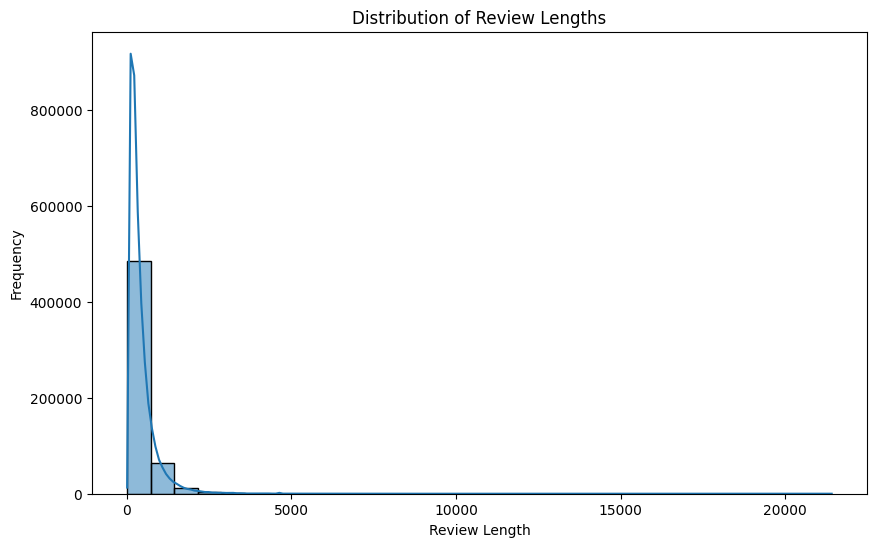

In [6]:
df['review_length'] = df['Text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins = 30, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

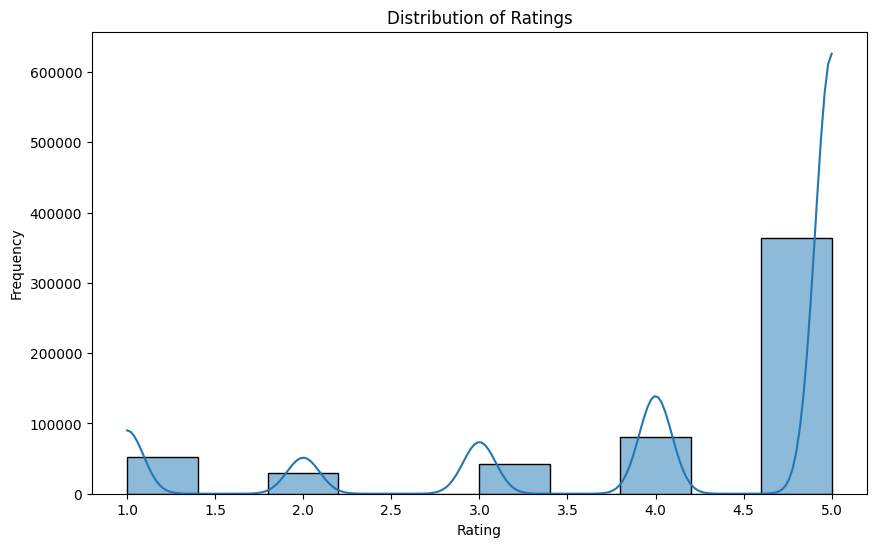

In [7]:
# Display the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=10, kde=True)  
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [8]:
duplicate_reviews = df.duplicated().sum()
print(f"Number of duplicate reviews: {duplicate_reviews}")

Number of duplicate reviews: 0


In [9]:
# Summary of unique values
unique_values = {
    'ProductId': df['ProductId'].nunique(),
    'UserId': df['UserId'].nunique(),
    'ProfileName': df['ProfileName'].nunique()
}
print("Unique values summary:\n", unique_values)

Unique values summary:
 {'ProductId': 74258, 'UserId': 256059, 'ProfileName': 218415}


# VADER Sentiment Analyzer

In [10]:
analyzer = SentimentIntensityAnalyzer()


In [11]:
# Define a function to get sentiment scores
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']


In [13]:
df['sentiment_score'] = df['Text'].apply(get_sentiment_score)

# Display the updated DataFrame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_length,sentiment_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.8138
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,0.9468


In [22]:
# Save the DataFrame 
df.to_csv('../results/amazon_reviews_with_sentiment.csv', index=False)


# Visualize Sentiment Scores

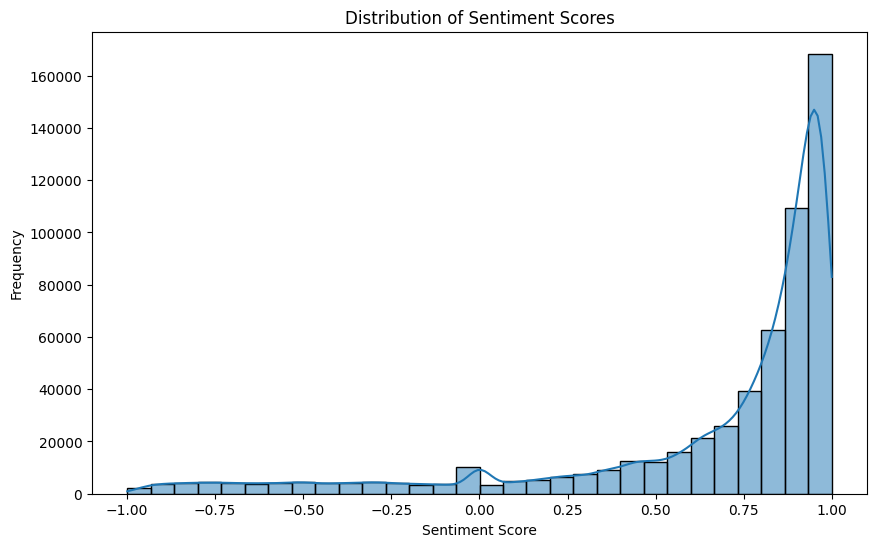

In [14]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Correlation

In [15]:
correlation = df[['sentiment_score', 'Score']].corr().iloc[0, 1]
print(f"Correlation between sentiment score and review score: {correlation:.4f}")

Correlation between sentiment score and review score: 0.5091


# Visualizing Correlation

### Scatter Plot with Regression Line

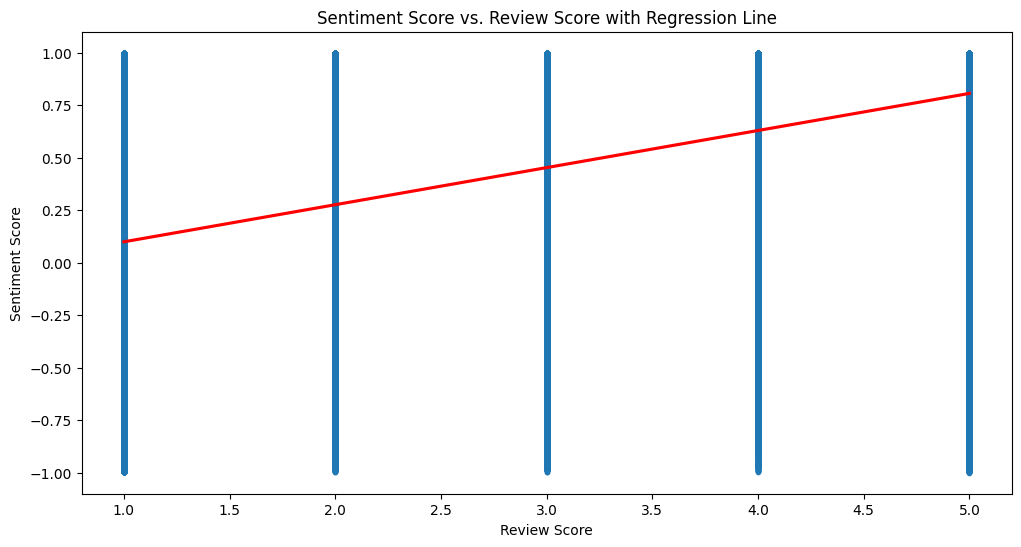

In [17]:

plt.figure(figsize=(12, 6))
sns.regplot(x='Score', y='sentiment_score', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Sentiment Score vs. Review Score with Regression Line')
plt.xlabel('Review Score')
plt.ylabel('Sentiment Score')
plt.show()


### Hexbin Plot

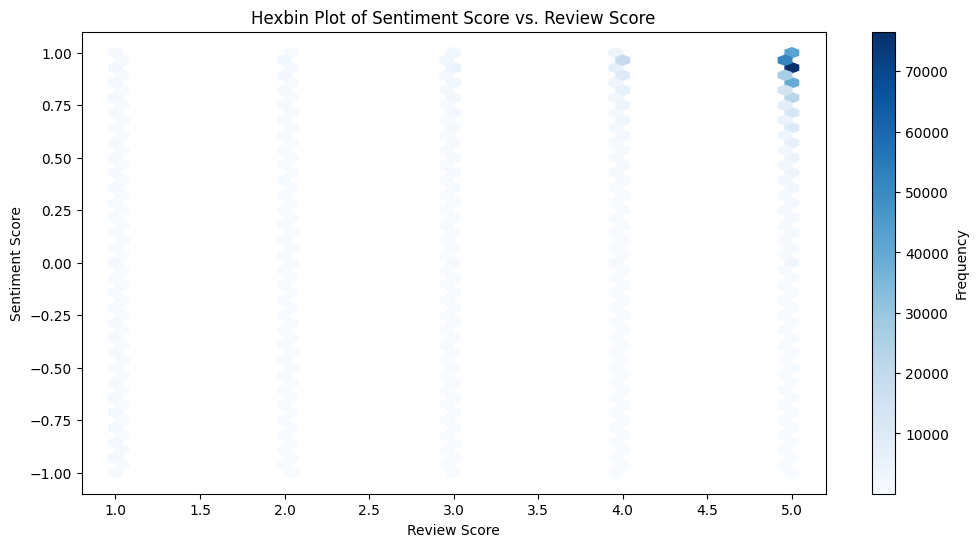

In [18]:
plt.figure(figsize=(12, 6))
plt.hexbin(df['Score'], df['sentiment_score'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Sentiment Score vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Sentiment Score')
plt.show()


### Joint Plot

<Figure size 1200x600 with 0 Axes>

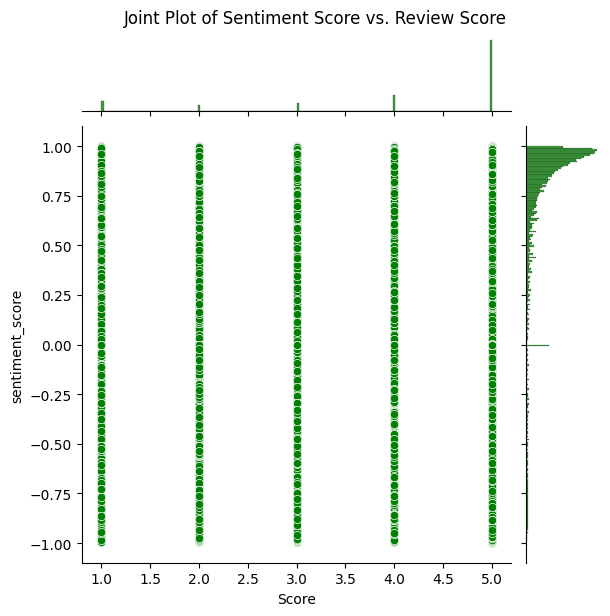

In [19]:

plt.figure(figsize=(12, 6))
sns.jointplot(x='Score', y='sentiment_score', data=df, kind='scatter', color='green')
plt.suptitle('Joint Plot of Sentiment Score vs. Review Score', y=1.02)
plt.show()


### Bubble Plot

c:\Sentiment-analysis-project\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


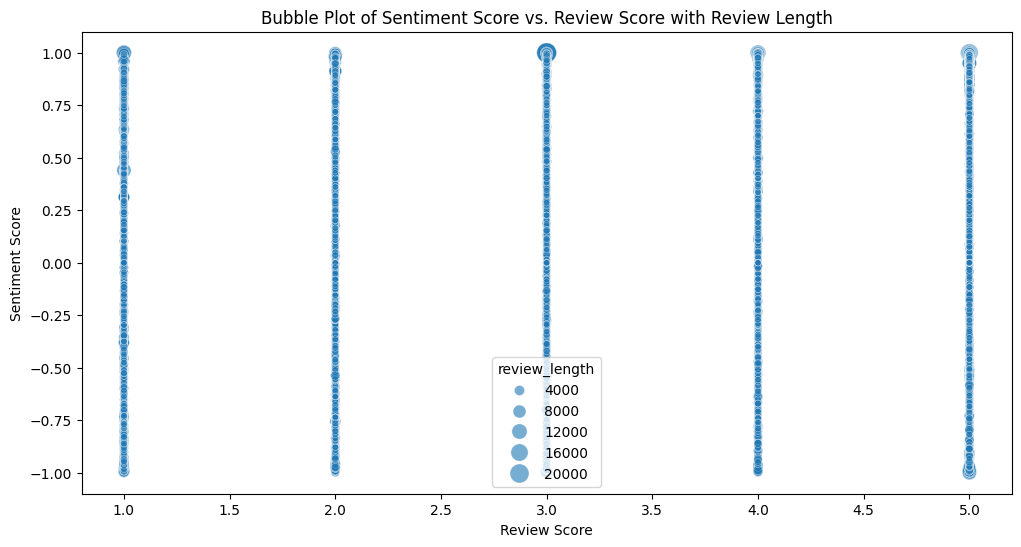

In [20]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Score', y='sentiment_score', size='review_length', sizes=(20, 200), data=df, alpha=0.6)
plt.title('Bubble Plot of Sentiment Score vs. Review Score with Review Length')
plt.xlabel('Review Score')
plt.ylabel('Sentiment Score')
plt.show()


### Pair Plot

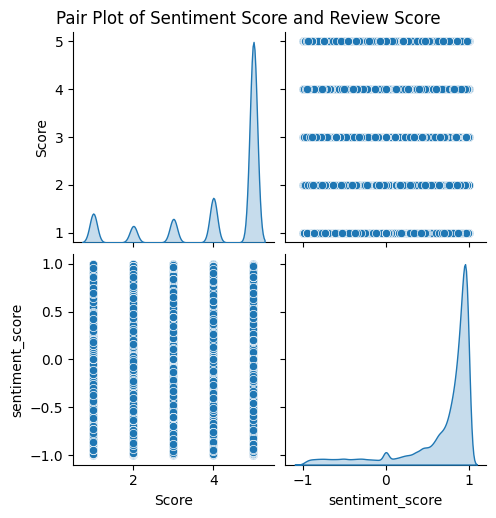

In [21]:
sns.pairplot(df[['Score', 'sentiment_score']], diag_kind='kde')
plt.suptitle('Pair Plot of Sentiment Score and Review Score', y=1.02)
plt.show()